In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [175]:
import nbodykit

In [176]:
painted_central_hod = np.load("central_hod.npy")
painted_sat_hod = np.load("sat_hod.npy")
painted_central_tf = np.load("central_tf.npy")
painted_sat_tf = np.load("sat_tf.npy") #normalization? Idk... 

In [177]:
painted_central_hod[0].shape,painted_central_tf[0].shape

((128, 128, 128), (128, 128, 128))

(0, 1.1)

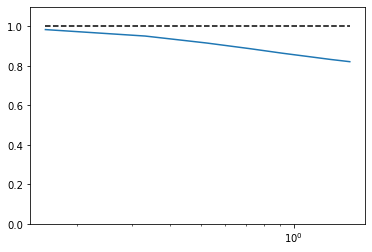

In [178]:
from nbodykit.lab import *
pm_central_hod = nbodykit.source.mesh.array.ArrayMesh(painted_central_hod[0], 250)
pm_central_tf = nbodykit.source.mesh.array.ArrayMesh(painted_central_tf[0], 250)


pk_central_hod = FFTPower(pm_central_hod, mode='1d', dk=0.2, kmin=0.01).power
pk_central_tf = FFTPower(pm_central_tf,mode='1d', dk=0.2, kmin=0.01).power


pk_x = FFTPower(pm_central_tf,second = pm_central_hod, mode='1d', dk=0.2, kmin=0.01).power
plt.semilogx(pk['k'], pk_x['power'].real/np.sqrt(pk_central_hod['power'].real*pk_central_tf['power'].real))
plt.plot([pk['k'][0],pk['k'][-1]],[1,1],"--",color="black")
plt.ylim([0,1.1])

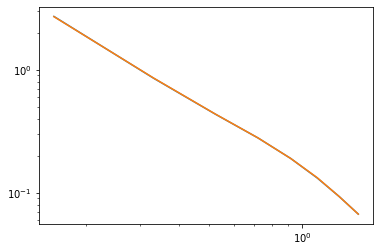

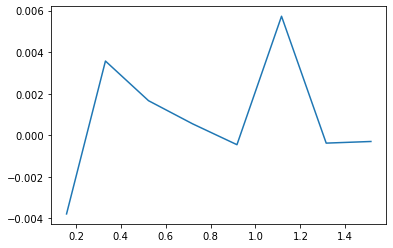

In [179]:
plt.loglog(pk['k'], pk_central_hod['power'].real)
plt.loglog(pk['k'], pk_central_tf['power'].real)
show()

plt.plot(pk['k'], (pk_central_tf['power'].real-pk_central_hod['power'].real)/pk_central_hod['power'].real)


In [180]:
pm_sat_hod = nbodykit.source.mesh.array.ArrayMesh(painted_sat_hod[0], 250)
pm_sat_tf = nbodykit.source.mesh.array.ArrayMesh(painted_sat_tf[0], 250)


pk_sat_hod = FFTPower(pm_sat_hod, mode='1d', dk=0.2, kmin=0.01).power
pk_sat_tf = FFTPower(pm_sat_tf,mode='1d', dk=0.2, kmin=0.01).power


(0, 1.1)

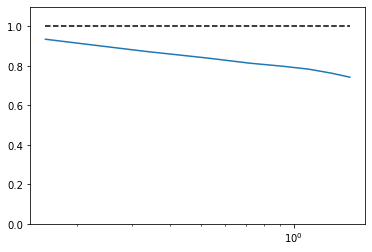

In [181]:

pk_x = FFTPower(pm_sat_tf,second = pm_sat_hod, mode='1d', dk=0.2, kmin=0.01).power
plt.semilogx(pk['k'], pk_x['power'].real/np.sqrt(pk_sat_hod['power'].real*pk_sat_tf['power'].real))
plt.plot([pk['k'][0],pk['k'][-1]],[1,1],"--",color="black")
plt.ylim([0,1.1])

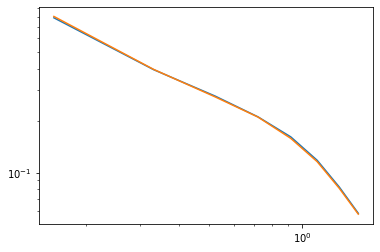

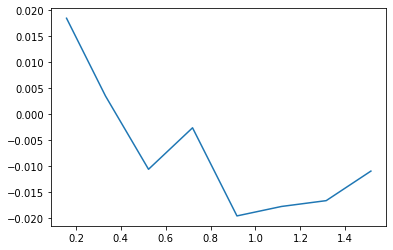

In [182]:
plt.loglog(pk['k'], pk_sat_hod['power'].real)
plt.loglog(pk['k'], pk_sat_tf['power'].real)
show()

plt.plot(pk['k'], (pk_sat_tf['power'].real-pk_sat_hod['power'].real)/pk_sat_hod['power'].real)


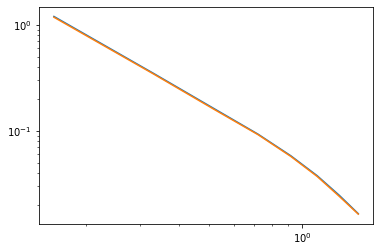

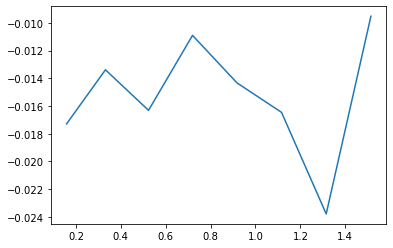

In [183]:
#galaxy-sattilite cross correlation
pk_x_tf = FFTPower(pm_sat_tf,second = pm_central_tf, mode='1d', dk=0.2, kmin=0.01).power
plt.loglog(pk['k'], pk_x_tf['power'].real)

pk_x_hod = FFTPower(pm_sat_hod,second = pm_central_hod, mode='1d', dk=0.2, kmin=0.01).power
plt.loglog(pk['k'], pk_x_hod['power'].real)

show()


pk_x_hod = FFTPower(pm_sat_hod,second = pm_central_hod, mode='1d', dk=0.2, kmin=0.01).power
plt.plot(pk['k'], (pk_x_hod['power'].real-pk_x_tf['power'].real)/pk_x_hod['power'].real)
#plt.plot([pk['k'][0],pk['k'][-1]],[1,1],"--",color="black")
#plt.ylim([0,1.1])

In [184]:
#LOOPING

0


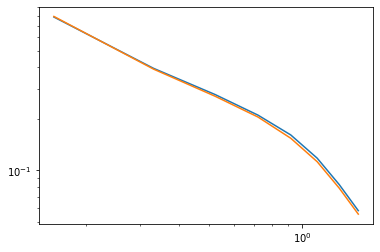

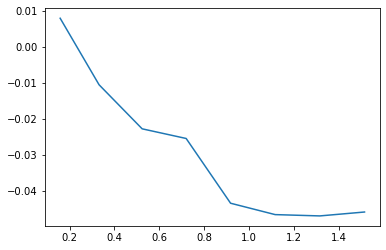

1


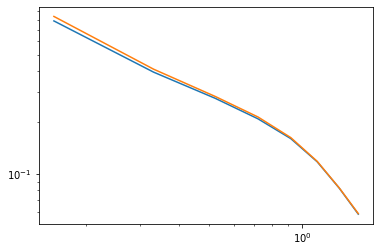

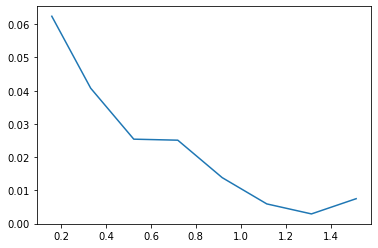

2


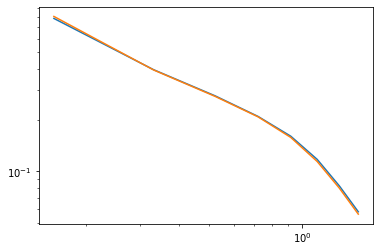

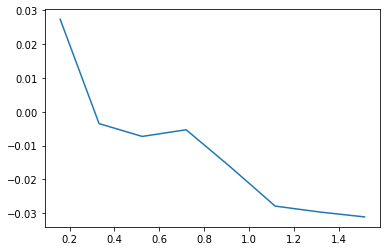

3


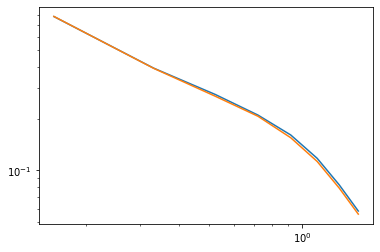

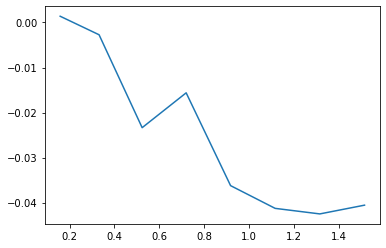

4


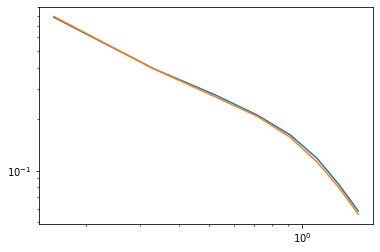

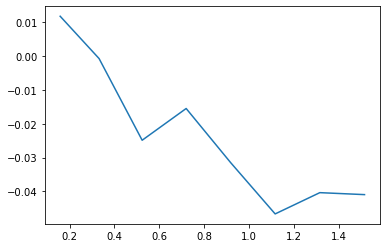

5


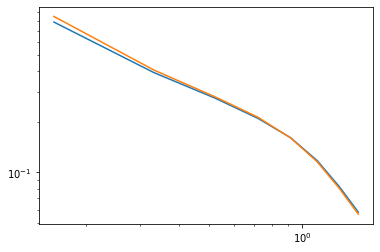

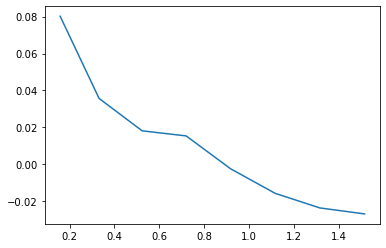

6


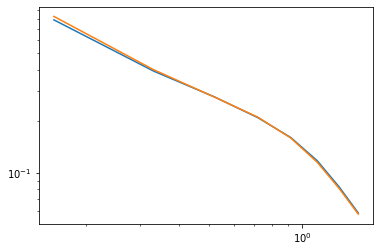

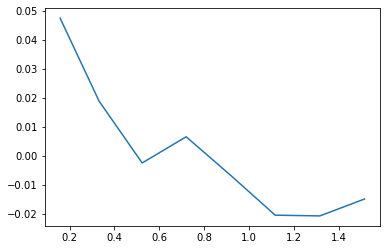

7


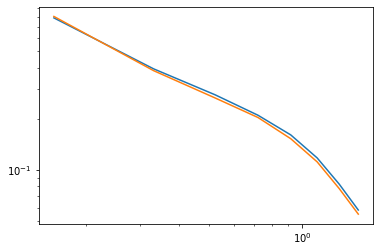

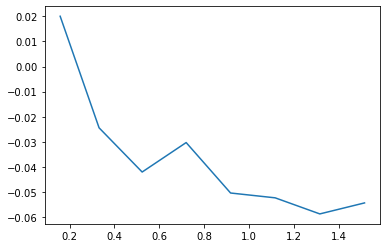

8


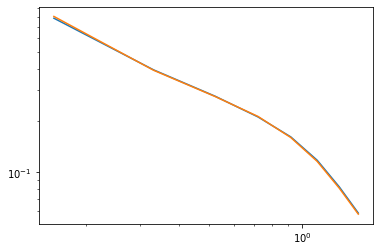

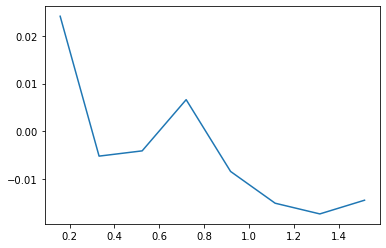

9


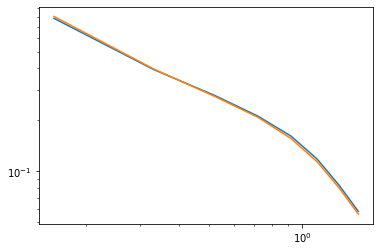

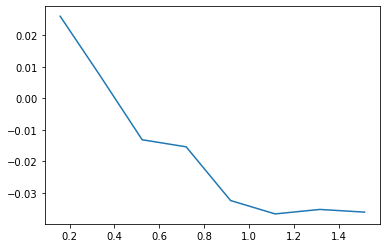

In [200]:
nsamples = 10

pk_hod = []
pk_tf = []

pk_tf_cen = []
pk_hod_cen = []


pk_tf_all = []
pk_hod_all = []


for i in range(0,nsamples):
    print(i)

    painted_central_hod = np.load("central_hod_"+str(i)+".npy")
    painted_sat_hod = np.load("sat_hod_"+str(i)+".npy")
    painted_central_tf = np.load("central_tf_"+str(i)+".npy")
    painted_sat_tf = np.load("sat_tf_"+str(i)+".npy") #normalization? Idk... 
    pm_central_hod = nbodykit.source.mesh.array.ArrayMesh(painted_central_hod[0], 250)
    pm_central_tf = nbodykit.source.mesh.array.ArrayMesh(painted_central_tf[0], 250)


    pk_central_hod = FFTPower(pm_central_hod, mode='1d', dk=0.2, kmin=0.01).power
    pk_central_tf = FFTPower(pm_central_tf,mode='1d', dk=0.2, kmin=0.01).power


    pk_x = FFTPower(pm_central_tf,second = pm_central_hod, mode='1d', dk=0.2, kmin=0.01).power
   # plt.semilogx(pk['k'], pk_x['power'].real/np.sqrt(pk_central_hod['power'].real*pk_central_tf['power'].real))
   # plt.plot([pk['k'][0],pk['k'][-1]],[1,1],"--",color="black")
   # plt.ylim([0,1.1])
   # plt.show()
    
    pk_hod_cen.append(pk_central_hod['power'].real)
    pk_tf_cen.append(pk_central_tf['power'].real)
    
    pm_sat_hod = nbodykit.source.mesh.array.ArrayMesh(painted_sat_hod[0], 250)
    pm_sat_tf = nbodykit.source.mesh.array.ArrayMesh(painted_sat_tf[0], 250)


    pk_sat_hod = FFTPower(pm_sat_hod, mode='1d', dk=0.2, kmin=0.01).power
    pk_sat_tf = FFTPower(pm_sat_tf,mode='1d', dk=0.2, kmin=0.01).power
    plt.loglog(pk['k'], pk_sat_hod['power'].real)
    plt.loglog(pk['k'], pk_sat_tf['power'].real)
    show()
    pk_hod.append(pk_sat_hod['power'].real)
    pk_tf.append(pk_sat_tf['power'].real)
    plt.plot(pk['k'], (pk_sat_tf['power'].real-pk_sat_hod['power'].real)/pk_sat_hod['power'].real)
    show()
    
    
    pm_all_hod = nbodykit.source.mesh.array.ArrayMesh(painted_sat_hod[0]+painted_central_hod[0], 250)
    pm_all_tf = nbodykit.source.mesh.array.ArrayMesh(painted_sat_tf[0]+painted_central_tf[0], 250)


    pk_all_hod = FFTPower(pm_all_hod, mode='1d', dk=0.2, kmin=0.01).power
    pk_all_tf = FFTPower(pm_all_tf,mode='1d', dk=0.2, kmin=0.01).power
    
    pk_hod_all.append(pk_all_hod['power'].real)
    pk_tf_all.append(pk_all_tf['power'].real)
 
    

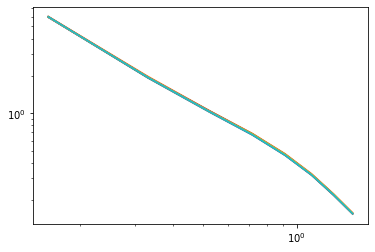

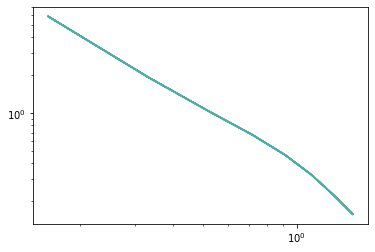

In [202]:
for i in range(0,10):
    loglog(pk['k'],np.array(pk_tf_all)[i])
show()

for i in range(0,10):
    loglog(pk['k'],np.array(pk_hod_all)[i])

In [205]:
sat_err = np.std(np.array(pk_tf),axis=0)/pk_sat_hod['power'].real
cen_err = np.std(np.array(pk_tf_cen),axis=0)/pk_central_hod['power'].real
all_err = np.std(np.array(pk_tf_all),axis=0)/pk_all_hod['power'].real


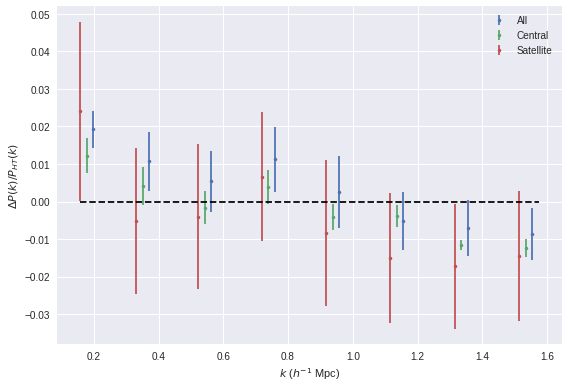

In [228]:


plt.errorbar(pk['k']+0.04, (pk_tf_all[8]-pk_all_hod['power'].real)/pk_all_hod['power'].real,yerr=all_err,label="All",fmt='.')
plt.errorbar(pk['k']+0.02, (pk_tf_cen[8]-pk_central_hod['power'].real)/pk_central_hod['power'].real,yerr=cen_err,label="Central",fmt='.')


plt.errorbar(pk['k'], (pk_tf[8]-pk_sat_hod['power'].real)/pk_sat_hod['power'].real,yerr=np.std(np.array(pk_tf),axis=0)/pk_sat_hod['power'].real, label="Satellite",fmt='.')
plt.ylabel("$\Delta P(k)/P_{HT}(k)$")
plt.xlabel("$k$ ($h^{-1}$ Mpc)")

plt.plot([pk['k'][0],pk['k'][-1]+0.06],[0,0], "k--")
#show()


legend(loc=1)

tight_layout()
plt.savefig("ps_error.pdf")
#show()

